# 🌟 Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("BankNote_Authentication.csv")

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## ✔ As we can see we dont have any missing values👍

# 🧐 Exploratory Data Analysis

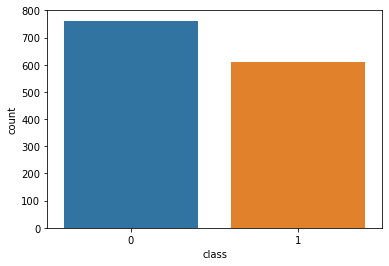

In [5]:
sns.countplot(x=df["class"])

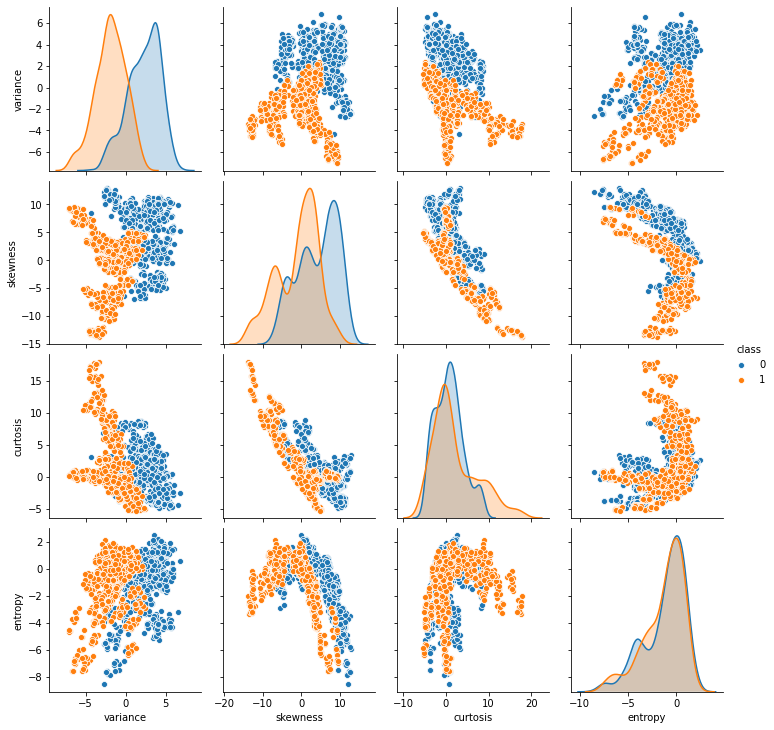

In [6]:
sns.pairplot(df, hue="class")

# ⚙ Data PreProcessing

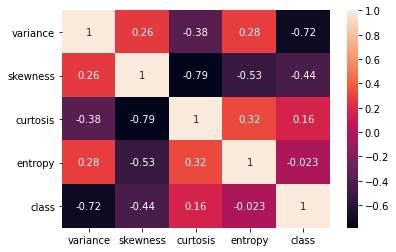

In [6]:
sns.heatmap(df.corr(), annot=True)

## ⭕ From Above Diagram we can see their is a **multicolliniraty** between **curtosis** and **skewness** can be ignored

In [7]:
columns = list(df.columns)
columns.remove('class')

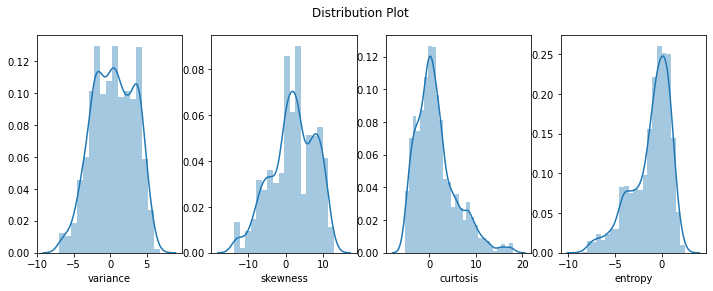

In [9]:
fig, ax = plt.subplots(ncols = 4, figsize=(12, 4))
fig.suptitle("Distribution Plot")

for index, column in enumerate(columns):
    sns.distplot(df[column], ax=ax[index])

# Conclution From Above Diagram
1. Their may be outliers in **entropy** and **curtosis** column
2. Data is not normalized

since we gonna use trees in our model above things dont effect model much

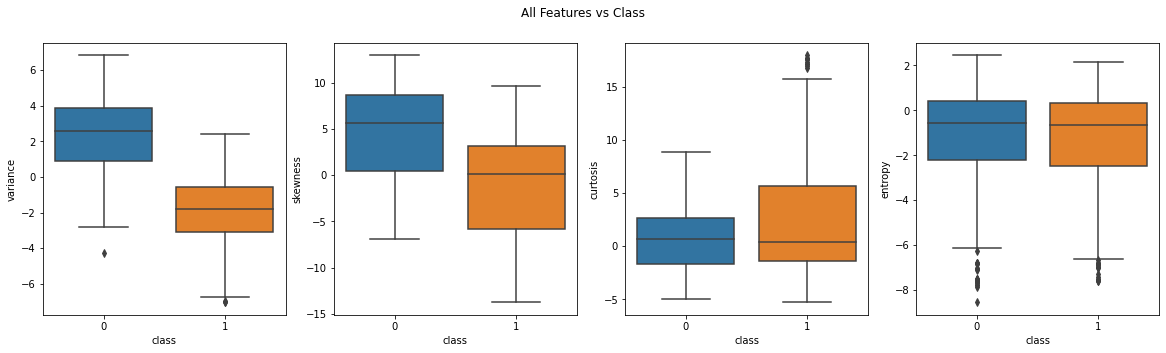

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
fig.suptitle("All Features vs Class")

for index, column in enumerate(columns):
    sns.boxplot(x="class", y=column, data=df, ax=ax[index])

# 🔥 Model Creation

In [39]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [40]:
X = df.loc[: ,df.columns != "class"]
y = df["class"]

In [44]:
rfc = RandomForestClassifier()
xgbc = XGBClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=142)

In [45]:
rfc.fit(X_train, y_train)
xgbc.fit(X_train, y_train)

[17:00:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
print("RandomTreeClassifier Train Score: ", rfc.score(X_train, y_train))
print("RandomTreeClassifier Test Score: ", rfc.score(X_test, y_test))

print("==============================================================")

print("XGBClassifier Train Score: ", xgbc.score(X_train, y_train))
print("XGBClassifier Test Score: ", xgbc.score(X_test, y_test))

RandomTreeClassifier Train Score:  1.0
RandomTreeClassifier Test Score:  0.9963570127504554
XGBClassifier Train Score:  1.0
XGBClassifier Test Score:  1.0


In [48]:
import pickle
filename = "best_classifier.pickle"

with open(filename, "wb") as file:
    pickle.dump(xgbc, file)